In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Читаем данные

In [37]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Обработка данных

In [39]:
# Обработка отсутствующих значений
data['Pregnancies'] = data['Pregnancies'].replace(0, np.nan)
data['Glucose'] = data['Glucose'].replace(0, np.nan)
data['BloodPressure'] = data['BloodPressure'].replace(0, np.nan)
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)
data['Insulin'] = data['Insulin'].replace(0, np.nan)
data['BMI'] = data['BMI'].replace(0, np.nan)
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].replace(0, np.nan)
data['Age'] = data['Age'].replace(0, np.nan)

# Заполняем пустые значения средними значениями по столбцу
data.fillna(data.mean(), inplace=True)

# Масштабирование данных
scaler = StandardScaler()
scaled_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.062549e-01,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-1.175289e+00,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.178873e+00,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-1.175289e+00,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,2.987023e-16,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.851490e+00,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-8.389806e-01,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,0
765,1.699460e-01,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-1.175289e+00,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1


### Визуализация статистики по датаесту

        Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  7.680000e+02  7.680000e+02   7.680000e+02   7.680000e+02  7.680000e+02   
mean   2.359224e-16 -3.561966e-16   6.915764e-16   7.956598e-16 -3.330669e-16   
std    1.000652e+00  1.000652e+00   1.000652e+00   1.000652e+00  1.000652e+00   
min   -1.175289e+00 -2.554131e+00  -4.004245e+00  -2.521670e+00 -1.665945e+00   
25%   -8.389806e-01 -7.212214e-01  -6.953060e-01  -4.727737e-01 -4.007289e-01   
50%    2.987023e-16 -1.540881e-01  -1.675912e-02   8.087936e-16 -3.345079e-16   
75%    5.062549e-01  6.103090e-01   6.282695e-01   3.240194e-01 -3.345079e-16   
max    4.205652e+00  2.541850e+00   4.102655e+00   7.950467e+00  8.126238e+00   

                BMI  DiabetesPedigreeFunction           Age     Outcome  
count  7.680000e+02              7.680000e+02  7.680000e+02  768.000000  
mean   3.515706e-16              2.451743e-16  1.931325e-16    0.348958  
std    1.000652e+00              1.000652e+00  1

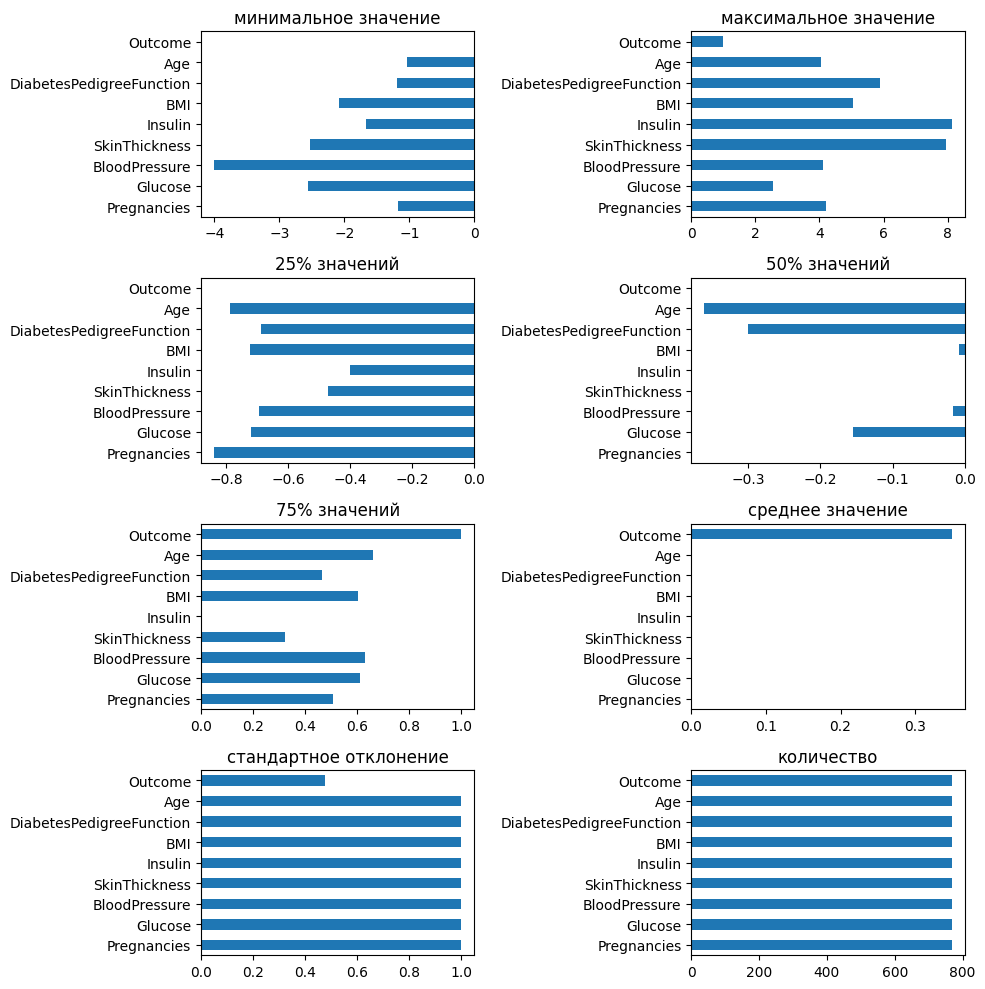

In [40]:
statistic = data.describe()
print(statistic)

# Выбор нужных статистик
mean_values = statistic.loc['mean']
std_values = statistic.loc['std']
count_values = statistic.loc['count']
min_values = statistic.loc['min']
quarter_values = statistic.loc['25%']
half_values = statistic.loc['50%']
three_quarters_values = statistic.loc['75%']
max_values = statistic.loc['max']

value_array = [min_values, max_values, quarter_values, half_values, three_quarters_values, mean_values, std_values, count_values]
graf_names = ['минимальное значение', 'максимальное значение',
              '25% значений', '50% значений',
              '75% значений', 'среднее значение',
              'стандартное отклонение', 'количество']

# Размер графика
plt.figure(figsize=(10, 10))

for i in range(1, 9):
    plt.subplot(4, 2, i)
    value_array[i-1].plot(kind='barh')
    plt.title(graf_names[i-1])   

plt.tight_layout()
plt.show()

### Разделение данных на обучающие и тестовые


In [41]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

      Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
60  -8.389806e-01 -1.239039   1.175571e-15   8.087936e-16 -3.345079e-16   
618  1.515182e+00 -0.318475   7.937164e-01  -5.866013e-01 -3.345079e-16   
346 -1.175289e+00  0.569212  -2.184328e+00  -1.155739e+00 -8.538527e-01   
294  2.987023e-16  1.292513  -1.853434e+00   8.087936e-16 -3.345079e-16   
231  5.062549e-01  0.404826   6.282695e-01   8.931573e-01  2.523979e+00   
..            ...       ...            ...            ...           ...   
71   1.699460e-01  0.569212  -6.953060e-01   6.655021e-01 -1.829940e-01   
106 -1.175289e+00 -0.844511   4.102655e+00   8.087936e-16 -3.345079e-16   
270  1.851490e+00 -0.680125   1.124610e+00   8.931573e-01 -3.345079e-16   
435  2.987023e-16  0.634967   1.175571e-15   8.087936e-16 -3.345079e-16   
102  2.987023e-16  0.108930   1.951845e+00   8.087936e-16 -3.345079e-16   

          BMI  DiabetesPedigreeFunction       Age  
60   0.000000                 -0.507006 -1.0415

### Метод логистической регрессии

In [49]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    # Вычисляет вероятность, переводя линейную комбинацию в диапазон [0, 1]
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    
    # Измеряет расхождение между предсказаниями и реальными значениями
    def log_loss(self, y, y_pred):
        m = len(y)
        return -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    
    # Метод для обучения модели
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Градиентный спуск
        for i in range(self.num_iterations):
            # Предсказания
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            # Обновление параметров
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Логирование функции потерь на каждой 100-й итерации
            if i % 100 == 0:
                loss = self.log_loss(y, y_pred)
                print(f"Iteration {i}, Loss: {loss}")
                print(f"dw {dw}\n db: {db}")
          
            
    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_pred]
    
# Обучение модели логистической регрессии
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Оценка модели
predictions = model.predict(X_test)
print(predictions)
print(y_test)
accuracy = np.mean(predictions == y_test)
accuracy

Iteration 0, Loss: 0.6931471805599454
dw [-0.11055021 -0.22940279 -0.07811264 -0.10366094 -0.099769   -0.15546838
 -0.07603357 -0.13499619]
 db: 0.15309446254071662
Iteration 100, Loss: 0.5882941924217499
dw [-0.06027116 -0.15450092 -0.03032362 -0.05225899 -0.04811209 -0.09406573
 -0.04550275 -0.07890361]
 db: 0.11780702240033471
Iteration 200, Loss: 0.5429267697404786
dw [-0.03501659 -0.11296091 -0.00805079 -0.02761629 -0.02269937 -0.06302045
 -0.0296884  -0.04990833]
 db: 0.09383240541218578
Iteration 300, Loss: 0.5189887589115426
dw [-0.02163618 -0.08780441  0.00263254 -0.01507954 -0.00917935 -0.04605799
 -0.02065601 -0.03399841]
 db: 0.07672848621348764
Iteration 400, Loss: 0.5044888458604984
dw [-0.01403048 -0.07109621  0.0079106  -0.00816684 -0.0013523  -0.03586139
 -0.01496222 -0.02458982]
 db: 0.06383027475552934
Iteration 500, Loss: 0.49487924928114013
dw [-0.00946104 -0.0592179   0.0104662  -0.00411938  0.00341492 -0.02924665
 -0.01112695 -0.01867878]
 db: 0.05372533618052281

np.float64(0.7467532467532467)